<a href="https://colab.research.google.com/github/sabnadk/PCVK_Ganjil_2023/blob/main/Week6_Sabna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODUL 6 - Histogram Equalization, Dithering**

Nama   : Sabna Devi Kumalasari

NIM    : 2141720009

Kelas  : TI-3E

### **TUGAS PRAKTIKUM**

1. Import Folder

In [2]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

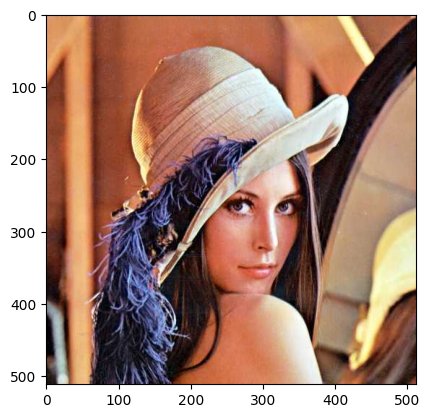

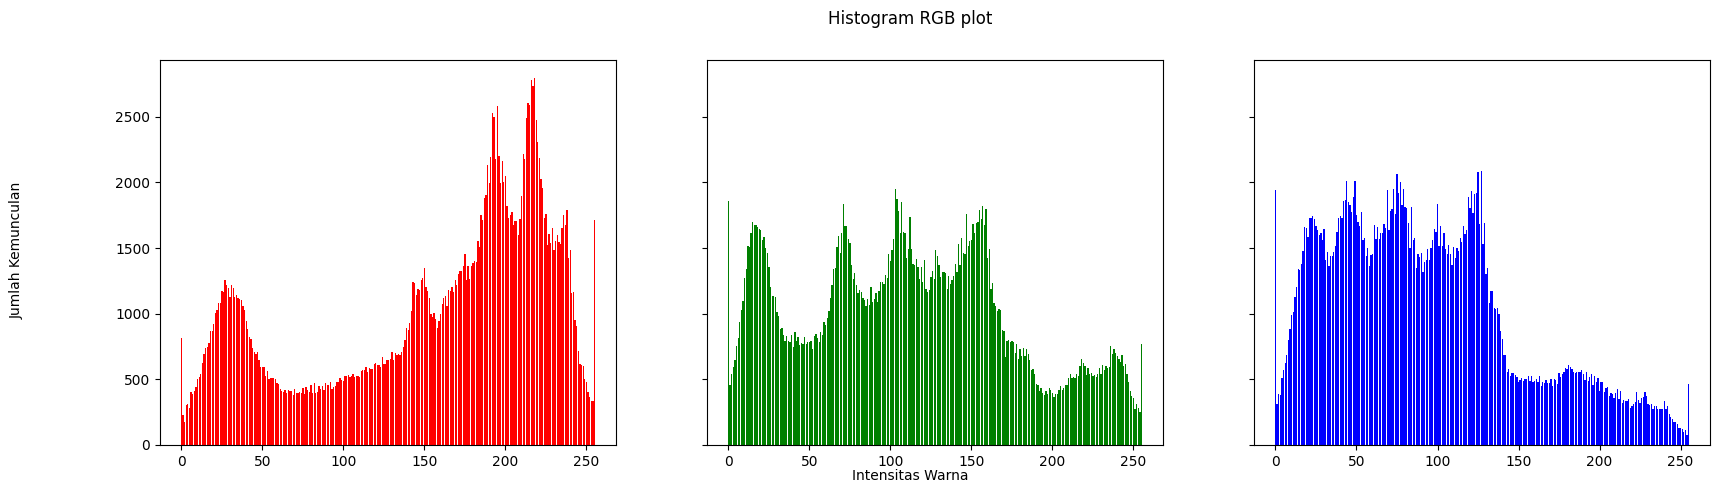

In [4]:
img_1 = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena.jpg')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img_1)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

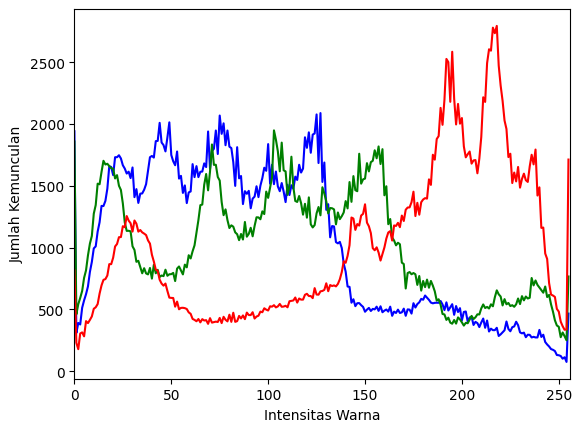

In [5]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

# membuat histogram plot

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_1[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

Hasilnya sama dengan histogram sebelumnya, hanya saja pada langkah ini menggabungkan 3 histogram menjadi satu untuk langsung dibandingkan

4. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

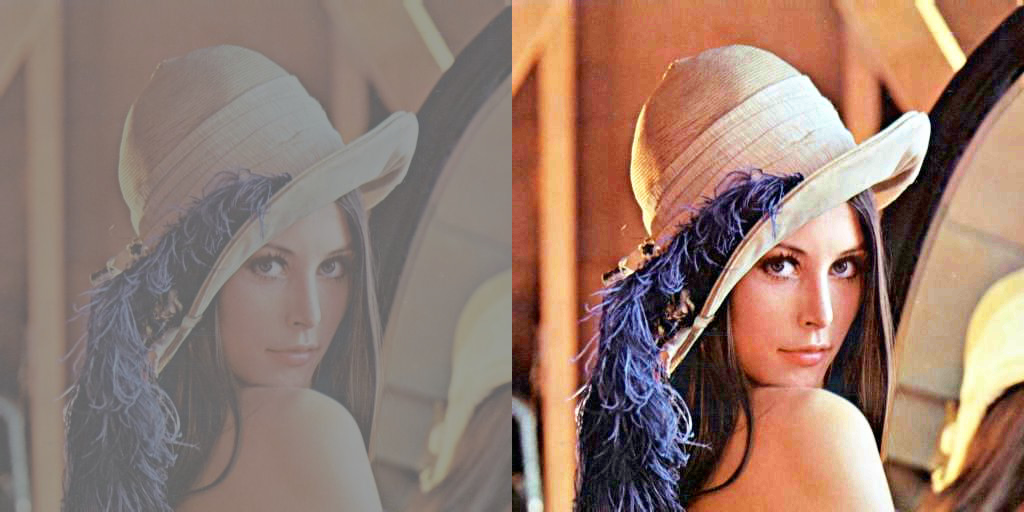

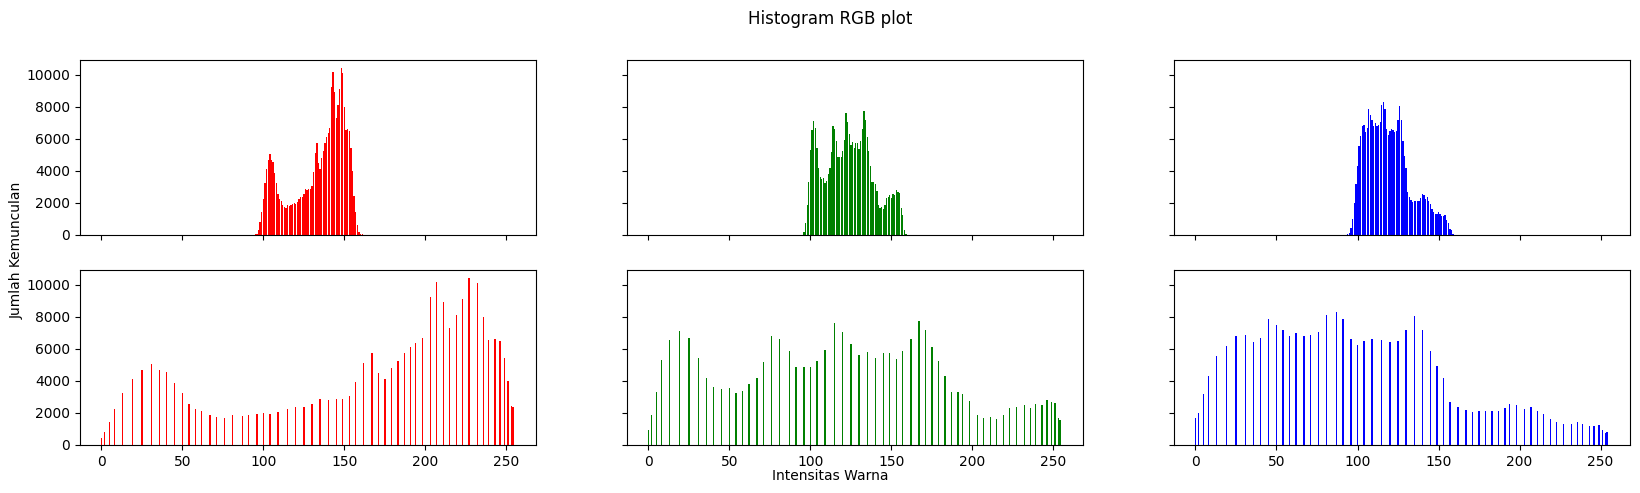

In [6]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
#is_color_image = len(img1.shape) == 3 and img1.shape[2] == 3

if (isgrayimg == False):
#if not is_color_image:
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

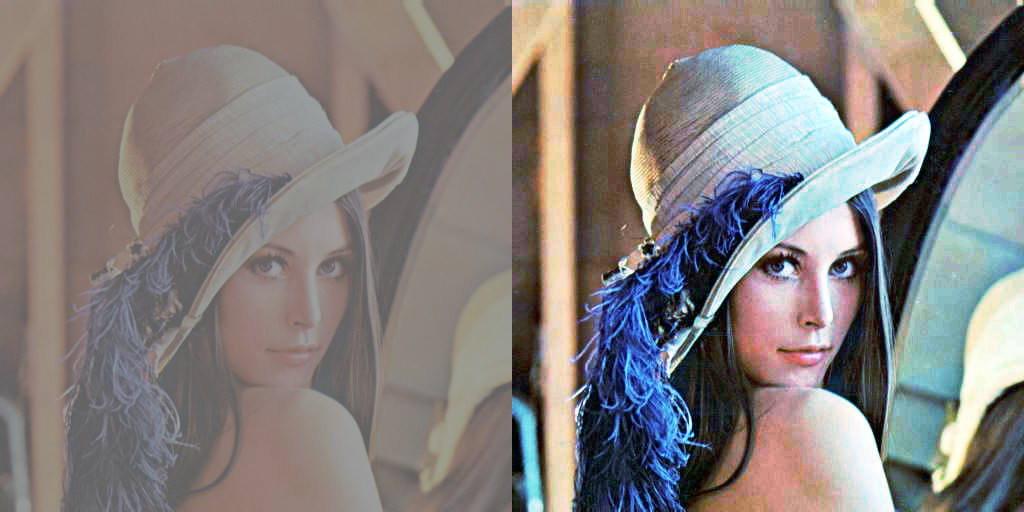

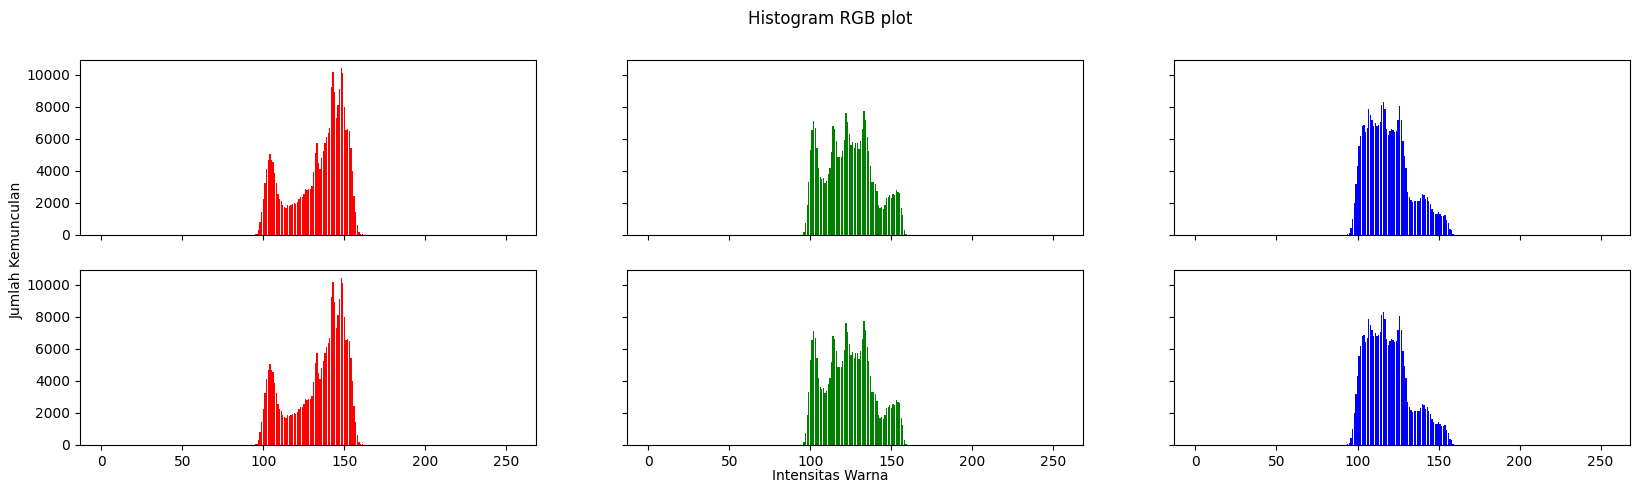

In [7]:
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

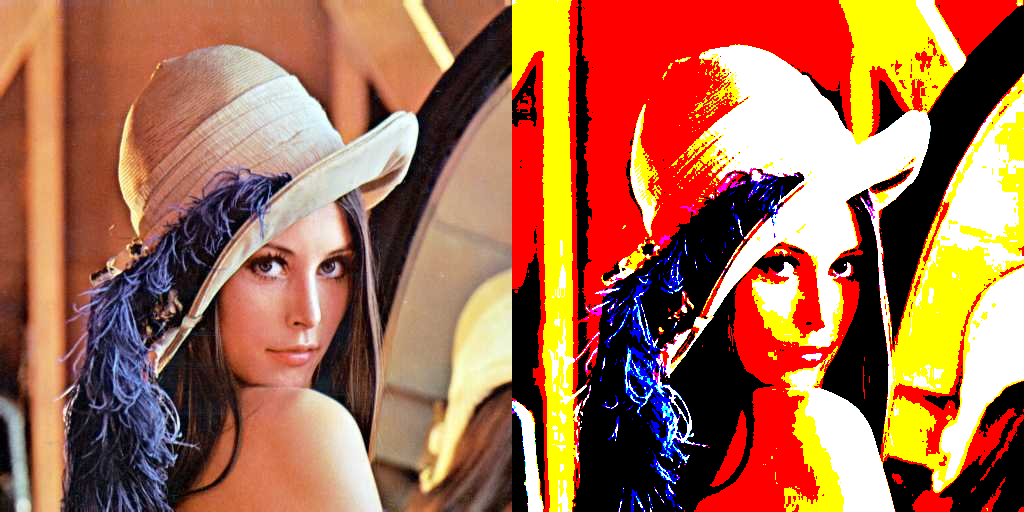

True

In [9]:
warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,255]]
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena.jpg')
#img = cv.resize(img, (0,0), fx=0.5, fy=0.5)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = np.zeros(img.shape, img.dtype)

for y in range(0,img.shape[0]):
  for x in range(0,img.shape[1]):
    baru = warnaTerdekat(img[y,x,0],img[y,x,1],img[y,x,2])
    img_baru[y,x] = warnaPallette[baru]
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = cv.cvtColor(img_baru, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img, img_baru))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/testlena1.jpg', img_baru)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

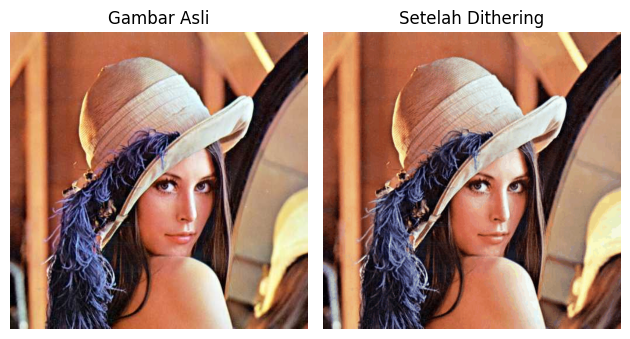

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Buka gambar asli
image = Image.open('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena.jpg')

# Tampilkan gambar asli
plt.subplot(1, 2, 1)
plt.title('Gambar Asli')
plt.imshow(image)
plt.axis('off')

# Terapkan dithering Floyd-Steinberg
image_dithered = image.convert('P', palette=Image.ADAPTIVE, dither=Image.FLOYDSTEINBERG)

# Tampilkan gambar setelah dithering
plt.subplot(1, 2, 2)
plt.title('Setelah Dithering')
plt.imshow(image_dithered)
plt.axis('off')

# Tampilkan plot
plt.tight_layout()
plt.show()


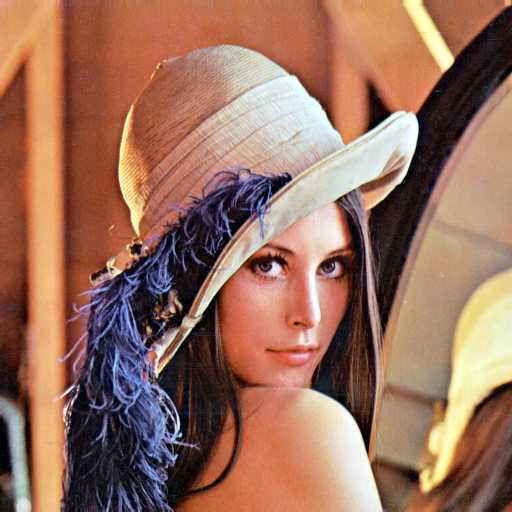

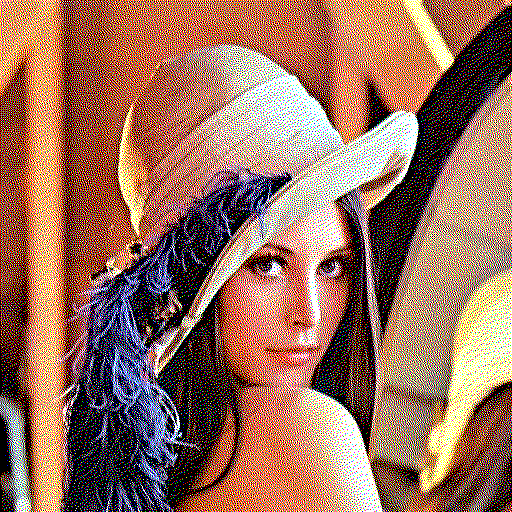

In [12]:
import cv2

# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
cv2_imshow(img)
cv2_imshow(output_img)

<ipython-input-10-75fb442ea1a5>:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_baru[y+1,x] = [img[y+1,x,0]+(np.float(7.0/16.0)*errorR),img[y+1,x,1]+(np.float(7.0/16.0)*errorG),img[y+1,x,2]+(np.float(7.0/16.0)*errorB)]
<ipython-input-10-75fb442ea1a5>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img_baru[y,x+1] = [img[y,x+1,0]+(

True

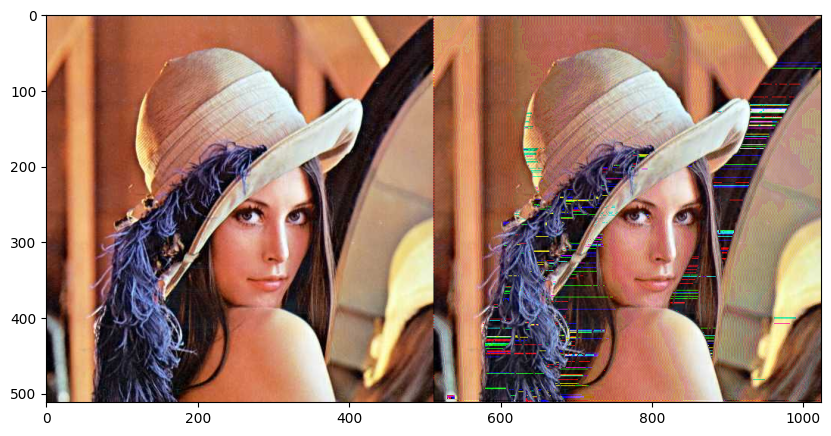

In [10]:
warnaPallette = [[0,0,0],[255,0,0],[0,255,0],[255,255,0],[0,0,255],[255,0,255],[0,255,255],[255,255,255]]
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena.jpg')
#img = cv.resize(img, (0,0), fx=0.25, fy=0.25)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_baru = np.copy(img)
errorR = 0
errorG = 0
errorB = 0

for y in range(img.shape[0]-1):
  for x in range(img.shape[1]-1):
    baru = warnaTerdekat(img_baru[y,x,0],img_baru[y,x,1],img_baru[y,x,2])
    img_baru[y,x] = warnaPallette[baru]
    errorR = int(img[y,x,0]) - int(img_baru[y,x,0])
    errorG = int(img[y,x,1]) - int(img_baru[y,x,1])
    errorB = int(img[y,x,2]) - int(img_baru[y,x,2])
    img_baru[y+1,x] = [img[y+1,x,0]+(np.float(7.0/16.0)*errorR),img[y+1,x,1]+(np.float(7.0/16.0)*errorG),img[y+1,x,2]+(np.float(7.0/16.0)*errorB)]
    if (y>0):
      img_baru[y-1,x+1] = [img[y-1,x+1,0]+(np.float(3.0/16.0)*errorR), img[y-1,x+1,1]+(np.float(3.0/16.0)*errorG), img[y-1,x+1,2]+(np.float(3.0/16.0)*errorB)]
    img_baru[y,x+1] = [img[y,x+1,0]+(np.float(5.0/16.0)*errorR), img[y,x+1,1]+(np.float(5.0/16.0)*errorG), img[y,x+1,2]+(np.float(5.0/16.0)*errorB)]
    img_baru[y+1,x+1] = [img[y+1,x+1,0]+(np.float(1.0/16.0)*errorR), img[y+1,x+1,1]+(np.float(1.0/16.0)*errorG), img[y+1,x+1,2]+(np.float(1.0/16.0)*errorB)]

final_frame = cv.hconcat((img, img_baru))
fig = plt.figure(figsize=(10,10))       #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/testlena2.jpg', img_baru)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

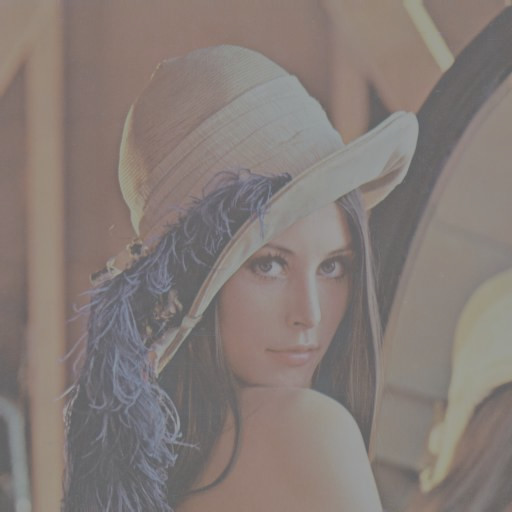

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 4.000e+00 9.000e+00 1.500e+01 6.500e+01 2.040e+02 6.620e+02 1.806e+03
 2.048

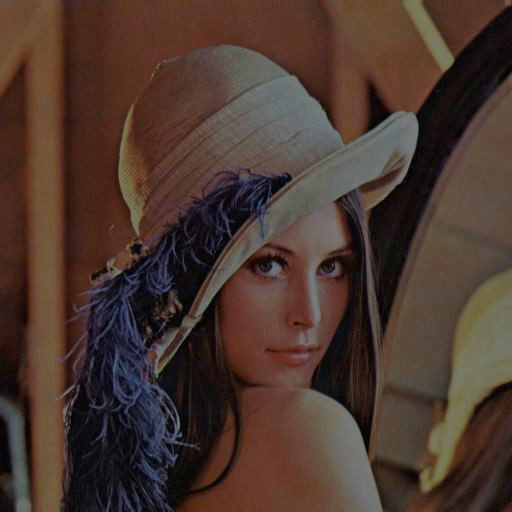

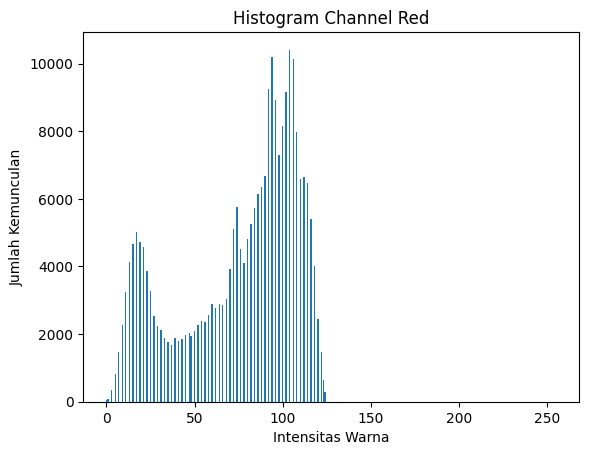

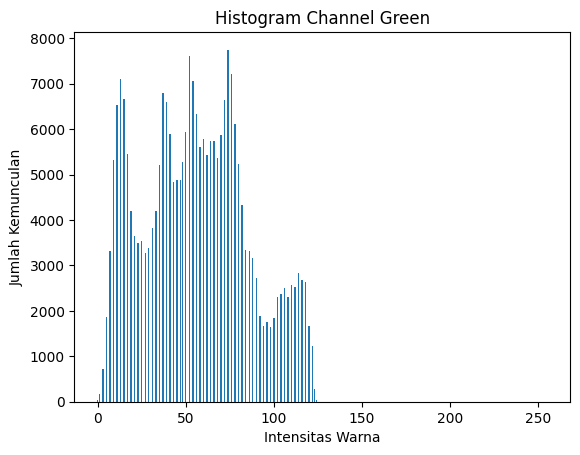

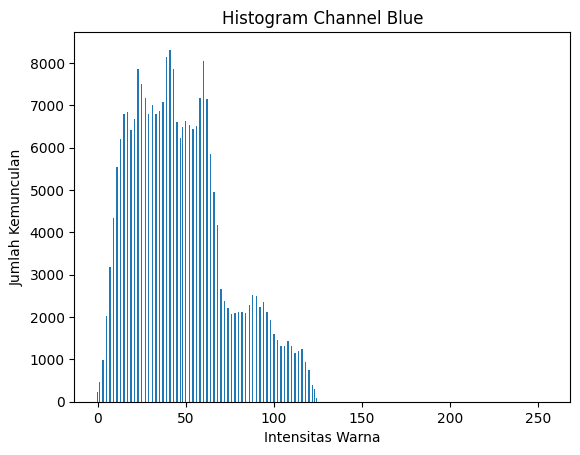

In [14]:
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena_lc.jpg')
cv2_imshow(img)



a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)

height, width, depth = np.shape(img)

#finding histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1

print(a)

#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,),dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

# b now contains the equalized histogram
b=b.astype(np.uint8)

print(b)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]

cv2_imshow(img)

height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

plt.title("Histogram Channel Red")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, red)
plt.show()
plt.title("Histogram Channel Green")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, green)
plt.show()
plt.title("Histogram Channel Blue")
plt.ylabel("Jumlah Kemunculan");
plt.xlabel("Intensitas Warna");
plt.bar(names, blue)
plt.show()

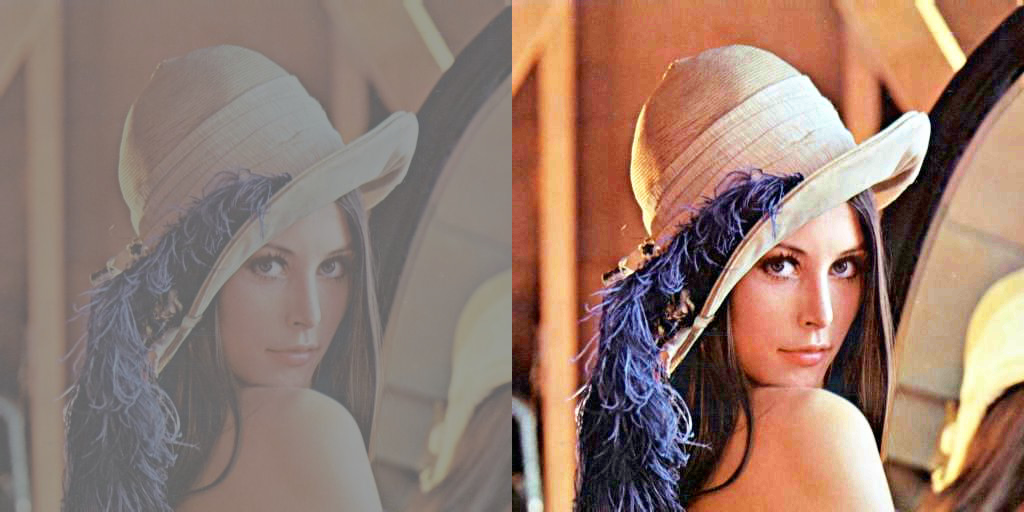

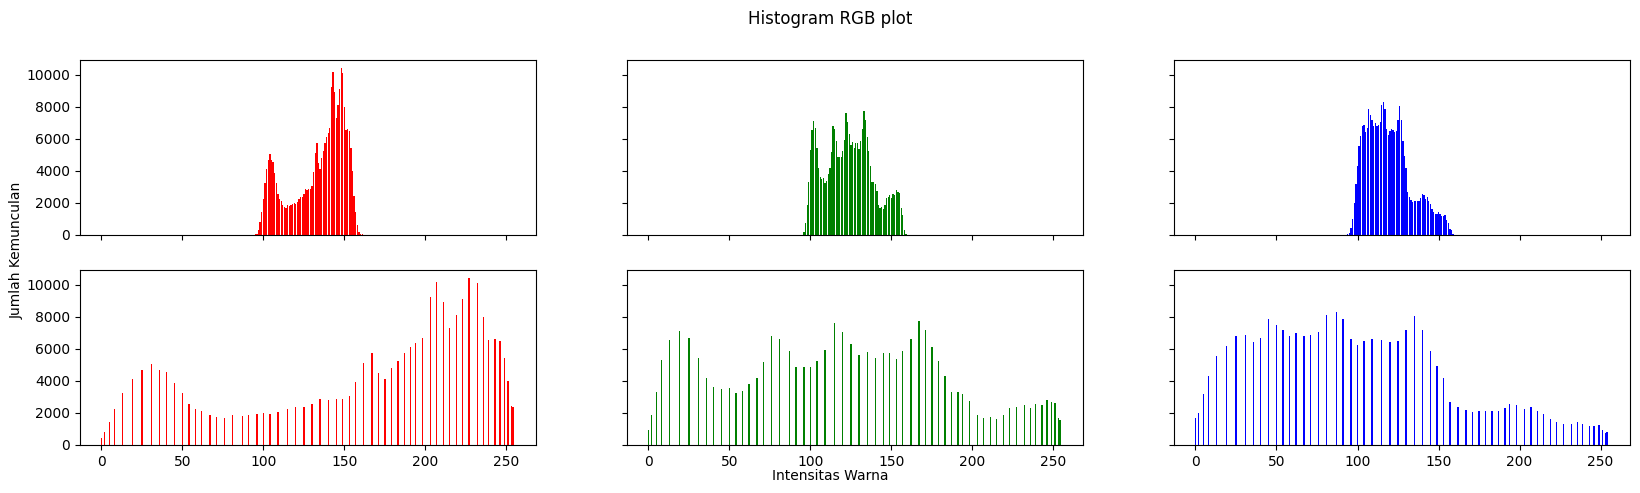

In [15]:
#histogram equalization benar
img = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena_lc.jpg')

histo_asli = histog(img)


#convert to NumPy array
img_array = np.asarray(img)

"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))      #concatenate image
cv2_imshow(final_frame)

names = np.arange(256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

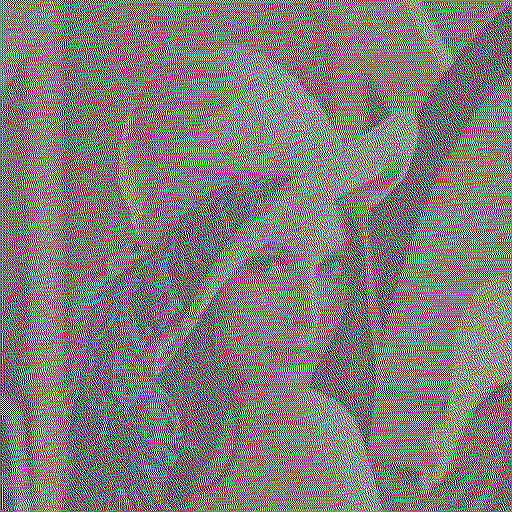

In [16]:
inMat = cv.imread('/content/drive/MyDrive/KULIAH/Semester 5/PCVK/Images/lena_lc.jpg')
height, width, depth = np.shape(inMat)
#https://en.wikipedia.org/wiki/Floyd–Steinberg_dithering
    #https://www.youtube.com/watch?v=0L2n8Tg2FwI&t=0s&list=WL&index=151
    #input is supposed as color
    # grab the image dimensions
   # height, width, depth = np.shape(inMat)

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

    # loop over the image
for y in range(0, height-1):
  for x in range(1, width-1):
    # threshold the pixel
    old_b = inMat[y, x, 0]
    old_g = inMat[y, x, 1]
    old_r = inMat[y, x, 2]
    samplingF = 1
    new_b = np.round(samplingF * old_b/255.0) * (255/samplingF)
    new_g = np.round(samplingF * old_g/255.0) * (255/samplingF)
    new_r = np.round(samplingF * old_r/255.0) * (255/samplingF)


    inMat[y, x, 0] = new_b
    inMat[y, x, 1] = new_g
    inMat[y, x, 2] = new_r




    quant_error_b = old_b - new_b
    quant_error_g = old_g - new_g
    quant_error_r = old_r - new_r


    inMat[y, x+1, 0] = minmax(inMat[y, x+1, 0] + quant_error_b * 7 / 16.0)
    inMat[y, x+1, 1] = minmax(inMat[y, x+1, 1] + quant_error_g * 7 / 16.0)
    inMat[y, x+1, 2] = minmax(inMat[y, x+1, 2] + quant_error_r * 7 / 16.0)

    inMat[y+1, x-1, 0] = minmax(inMat[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
    inMat[y+1, x-1, 1] = minmax(inMat[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
    inMat[y+1, x-1, 2] = minmax(inMat[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


    inMat[y+1, x, 0] = minmax(inMat[y+1, x, 0] + quant_error_b * 5 / 16.0)
    inMat[y+1, x, 1] = minmax(inMat[y+1, x, 1] + quant_error_g * 5 / 16.0)
    inMat[y+1, x, 2] = minmax(inMat[y+1, x, 2] + quant_error_r * 5 / 16.0)


    inMat[y+1, x+1, 0] = minmax(inMat[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
    inMat[y+1, x+1, 1] = minmax(inMat[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
    inMat[y+1, x+1, 2] = minmax(inMat[y+1, x+1, 2] + quant_error_r * 1 / 16.0)


            #   quant_error  := oldpixel - newpixel
            #   pixel[x + 1][y    ] := pixel[x + 1][y    ] + quant_error * 7 / 16
            #   pixel[x - 1][y + 1] := pixel[x - 1][y + 1] + quant_error * 3 / 16
            #   pixel[x    ][y + 1] := pixel[x    ][y + 1] + quant_error * 5 / 16
            #   pixel[x + 1][y + 1] := pixel[x + 1][y + 1] + quant_error * 1 / 16

cv2_imshow(inMat)